In [ ]:

# Загрузка необходимых библиотек и модулей
import torch
import zipfile # Библиотека для работы с zip архивами
import os      # Библиотека для работы с фаловой системой 
import time    # Библиотека для работы со временем

from google.colab import drive # Модуль для работы с Google Disk

In [1]:
# Подключаем гугл диск
drive.mount('/content/drive')

NameError: ignored

In [ ]:
# Прописываем путь к файлу с архивом
zip_file = '/content/drive/My Drive/DataSets/BigR.zip'
# Распаковываем архив
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()

# Просмотр результата разархивации
print(os.listdir())

['.config', '27 (62).png', '4 (77).png', '28 (378).png', '7 (454).png', '3 (183).png', '18 (66).png', '25 (299).png', '8 (357).png', '2 (11).png', '7 (170).png', '5 (150).png', '6 (408).png', '17 (239).png', '31 (366).png', '23 (168).png', '29 (44).png', '19 (269).png', '28 (146).png', '32 (13).png', '0 (847).png', '11 (105).png', '10 (362).png', '4 (162).png', '22 (146).png', '18 (355).png', '17 (358).png', '18 (152).png', '6 (423).png', '2 (150).png', '27 (238).png', '16 (264).png', '31 (301).png', '24 (118).png', '24 (289).png', '24 (459).png', '13 (250).png', '22 (128).png', '30 (262).png', '1 (350).png', '12 (34).png', '31 (365).png', '20 (235).png', '18 (487).png', '7 (296).png', '10 (41).png', '16 (449).png', '11 (48).png', '17 (310).png', '21 (130).png', '32 (360).png', '20 (145).png', '6 (37).png', '4 (35).png', '7 (370).png', '9 (301).png', '2 (229).png', '0 (918).png', '21 (330).png', '0 (21).png', '1 (381).png', '25 (380).png', '28 (375).png', '4 (75).png', '13 (142).png', 

In [ ]:
import cv2
import PIL
from PIL import Image
#Убираем четвертый канал и переводим из БГР в Серый(1 канал)
def make_background(image):
    file_without_extension = image.split('.')[0]
    image = cv2.imread(image, cv2.IMREAD_UNCHANGED)
    trans_mask = image[:, :, 3] == 0
    image[trans_mask] = [255, 255, 255, 255]
    new_img = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)
    return new_img
import PIL
from PIL import Image
#Переводим в нужный(28*28)размер
def resize(img,basewidth):
    #img = Image.open(image)
    img = Image.fromarray(img)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS) 
    arr = np.asarray(img, dtype='uint8')
    return torch.Tensor(arr)
#def rotate(image):
#    img = Image.open(image)
#    transformed_list = torch.Tensor([])
#    file_without_extension = image.split('.')[0]
#    angles = np.ndarray((2,),
#        buffer=np.array([-13, 13]), dtype=int)
#    for angle in angles:
#        transformed_list =  torch.cat(transformed_list,torch.Tensor(resize(make_background(transformed_image = cv2.transform.rotate(np.array(img),
#        angle, cval=255, preserve_range=True).astype(np.uint8)))))
#    return transformed_list


In [ ]:
import numpy as np

X_train = torch.Tensor([])
X_test = torch.Tensor([])

for i in range(33):
    for j in range(1,321):
        X_train = torch.cat((X_train, torch.Tensor(resize(make_background(f'{i} ({j}).png'),32))))

for i in range(33):
    for j in range(321,401):
        X_test = torch.cat((X_test, torch.Tensor(resize(make_background(f'{i} ({j}).png'),32))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)


In [ ]:
y_train = torch.Tensor([])
y_test = torch.Tensor([])
for i in range(33):
    for j in range(1,321):
        y_train = torch.cat((y_train,torch.Tensor([i])))
for i in range(33):
    for j in range(321,401):
        y_test = torch.cat((y_test, torch.Tensor([i])))


In [ ]:
X_train = X_train.reshape(10560,32,32)
X_test = X_test.reshape(2640,32,32)
X_train.shape

torch.Size([10560, 32, 32])

In [ ]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [ ]:
X_train.shape

torch.Size([10560, 1, 32, 32])

In [ ]:
y_train = y_train.int()
y_test = y_test.int()


In [ ]:
#####################################################

In [ ]:
# Прописываем путь к файлу с архивом
zzip_file = '/content/drive/My Drive/DataSets/RL.zip'  

# Распаковываем архив
zz = zipfile.ZipFile(zzip_file, 'r')
zz.extractall()

# Просмотр результата разархивации
print(os.listdir())

['.config', '27 (62).png', '4 (77).png', '28 (378).png', '7 (454).png', '3 (183).png', '18 (66).png', '25 (299).png', '8 (357).png', '2 (11).png', '7 (170).png', '5 (150).png', '6 (408).png', '17 (239).png', '31 (366).png', '23 (168).png', '29 (44).png', '19 (269).png', '28 (146).png', '32 (13).png', '0 (847).png', '11 (105).png', '10 (362).png', '4 (162).png', '22 (146).png', '18 (355).png', '17 (358).png', '18 (152).png', '6 (423).png', '2 (150).png', '27 (238).png', '16 (264).png', '31 (301).png', '24 (118).png', '24 (289).png', '24 (459).png', '13 (250).png', '22 (128).png', '30 (262).png', '1 (350).png', '12 (34).png', '31 (365).png', '20 (235).png', '18 (487).png', '7 (296).png', '10 (41).png', '16 (449).png', '11 (48).png', '17 (310).png', '21 (130).png', '32 (360).png', '20 (145).png', '6 (37).png', '4 (35).png', '7 (370).png', '9 (301).png', '2 (229).png', '0 (918).png', '21 (330).png', '0 (21).png', '1 (381).png', '25 (380).png', '28 (375).png', '4 (75).png', '13 (142).png', 

In [ ]:
#csv в list с марекерами и именами файлов
import csv
 
results = []
with open('letters.csv') as File:
    reader = csv.DictReader(File)
    for row in reader:
        results.append(row)
with open('letters2.csv') as File:
    reader = csv.DictReader(File)
    for row in reader:
        results.append(row)
with open('letters3.csv') as File:
    reader = csv.DictReader(File)
    for row in reader:
        results.append(row)

In [ ]:
results[0]['label']

'1'

In [ ]:
import h5py
import numpy as np
with h5py.File('LetterColorImages.h5', 'r') as f:
    for key in f.keys():
        print(key)
    all1 = torch.Tensor(f['images'])
with h5py.File('LetterColorImages2.h5', 'r') as f:
    for key in f.keys():
        print(key)
    all2 = torch.Tensor(f['images'])
with h5py.File('LetterColorImages3.h5', 'r') as f:
    for key in f.keys():
        print(key)
    all3 = torch.Tensor(f['images'])
all = torch.cat((all1,all2,all3))
print(all[0].shape)

backgrounds
images
labels
backgrounds
images
labels
backgrounds
images
labels
torch.Size([32, 32, 3])


In [ ]:
convert_f_n = dict({})
t = 0
for x in range(1,34):
    for i in range(1,51):
        if x<10:
            convert_f_n['0'+str(x)+'_'+str(i)+'.png'] = t
            t+=1
        else:
            convert_f_n[str(x)+'_'+str(i)+'.png'] = t
            t+=1
print(convert_f_n['01_12.png'])
for x in range(1,34):
    for i in range(51,231):
        if x<10:
            convert_f_n['0'+str(x)+'_'+str(i)+'.png'] = t
            t+=1
        else:
            convert_f_n[str(x)+'_'+str(i)+'.png'] = t
            t+=1
print(convert_f_n['04_120.png'])
for x in range(1,34):
    for i in range(231,431):
        if x<10:
            convert_f_n['0'+str(x)+'_'+str(i)+'.png'] = t
            t+=1
        else:
            convert_f_n[str(x)+'_'+str(i)+'.png'] = t
            t+=1
print(convert_f_n['14_270.png'])

11
2259
10229


In [ ]:
rl = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
conv_rl = dict({})
for x in range(1,34):
    conv_rl[x] = rl[x-1]


In [ ]:
Xs_test = tuple([all[i] for i in range(0,len(all),5)])
ys_test = [int(results[i]['label']) for i in range(0,len(all),5)]
Xs_train = tuple([all[i] for i in range(1,len(all),5)] + [all[i] for i in range(2,len(all),5)] + [all[i] for i in range(3,len(all),5)] + [all[i] for i in range(4,len(all),5)])
ys_train = [int(results[i]['label']) for i in range(1,len(all),5)] + [int(results[i]['label']) for i in range(2,len(all),5)] + [int(results[i]['label']) for i in range(3,len(all),5)] + [int(results[i]['label']) for i in range(4,len(all),5)]

In [ ]:
Xs_test = torch.cat(Xs_test)
Xs_train = torch.cat(Xs_train)

In [ ]:
Xs_test.shape

torch.Size([90816, 32, 3])

In [ ]:
Xs_train = Xs_train.reshape(11352,3,32,32)
Xs_test = Xs_test.reshape(2838,3,32,32)

In [ ]:
ys_test = torch.Tensor(ys_test)
ys_train = torch.Tensor(ys_train)

In [ ]:
y_test = y_test.int()
y_train = y_train.int()

In [ ]:
ys_test = ys_test 
ys_train = ys_train 
ys_test[-1]

tensor(33.)

In [ ]:
ys_test -= 1
ys_train -=1

In [ ]:
ys_test += 33
ys_train +=33

In [ ]:
ys_test[0]

tensor(33.)

In [ ]:
torch.tensor(np.dot(Xs_train[1].reshape(32,32,3), [0.299, 0.587, 0.114]))


tensor([[172.2330, 173.2330, 173.2330,  ..., 186.1190, 184.1300, 185.3580],
        [154.6460, 157.6460, 158.6460,  ..., 168.3470, 167.5320, 170.5320],
        [143.6460, 145.2330, 147.2330,  ..., 158.6460, 158.3470, 157.2330],
        ...,
        [179.1300, 180.1300, 178.5430,  ..., 188.2440, 190.2440, 189.3580],
        [180.1300, 178.5430, 179.1300,  ..., 187.7710, 187.2980, 188.7710],
        [180.1300, 178.1300, 179.5430,  ..., 186.2440, 187.7710, 188.6570]],
       dtype=torch.float64)

In [ ]:
torch.tensor(np.dot(Xs_train[0].reshape(32,32,3), [0.299, 0.587, 0.114])).shape

torch.Size([32, 32])

(2838, 11352)

In [ ]:
#
Xse_train = torch.tensor([])
Xse_test = torch.tensor([])
for i in range(len(ys_train)):
#    Xse_train = torch.cat((Xse_train,torch.tensor(np.dot(Xs_train[i].reshape(32,32,3), [0.299, 0.587, 0.114]))))
for i in range(len(ys_test)):
    Xse_test = torch.cat((Xse_test,torch.tensor(np.dot(Xs_test[i].reshape(32,32,3), [0.299, 0.587, 0.114]))))
#

In [ ]:
Xse_test = Xse_test.reshape(len(ys_test),1,32,32)
Xse_train = Xse_train.reshape(len(ys_train),1,32,32)

In [ ]:
Xse_test.shape

torch.Size([2838, 1, 32, 32])

In [ ]:
Xe_train = torch.cat((X_train,Xse_train))
Xe_test = torch.cat((X_test,Xse_test))

In [ ]:
ye_test = torch.cat((y_test,ys_test))
ye_train = torch.cat((y_train,ys_train))

In [ ]:
######################################################

In [ ]:
import torchvision.datasets


In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True


In [ ]:
MNIST_train = torchvision.datasets.MNIST('/',train=True,download=True)
MNIST_test = torchvision.datasets.MNIST('/',train=False,download=True)

In [ ]:
Xd_train = MNIST_train.train_data
yd_train = MNIST_train.train_labels
Xd_test = MNIST_test.test_data
yd_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
len(ye_test),len(ye_train)

(5478, 21912)

In [ ]:
Xd_train = Xd_train.reshape(60000,1,28,28)
Xd_test = Xd_test.reshape(10000,1,28,28)


In [ ]:
import torch.nn.functional as F
result = F.pad(input=Xd_test[0], pad=(2, 2, 2, 2), mode='constant', value=0)
result.shape

torch.Size([1, 32, 32])

In [ ]:
Xe_train.shape,Xd_train.shape

(torch.Size([21912, 1, 32, 32]), torch.Size([60000, 1, 28, 28]))

In [ ]:
yd_test += 66
yd_train += 66

In [ ]:
for i in range(830):
    Xe_test = torch.cat((Xe_test,F.pad(input=Xd_test[i], pad=(2, 2, 2, 2), mode='constant', value=0).reshape(1,1,32,32)))
ye_test = torch.cat((ye_test,yd_test[:830]))

In [ ]:
for i in range(3320):
    Xe_train = torch.cat((Xe_train,F.pad(input=Xd_train[i], pad=(2, 2, 2, 2), mode='constant', value=0).reshape(1,1,32,32)))
ye_train = torch.cat((ye_train,yd_train[:3320]))

In [ ]:
Xe_train.shape,Xe_test.shape

(torch.Size([25232, 1, 32, 32]), torch.Size([6308, 1, 32, 32]))

In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
ye_test = ye_test[:6308]
ye_train = ye_train[:25232]

In [ ]:
ye_test.shape,ye_train.shape

(torch.Size([6308]), torch.Size([25232]))

In [ ]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=0)
        self.act1  = torch.nn.ELU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.ELU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ELU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ELU()
        
        self.fc3   = torch.nn.Linear(84, 76)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=5.0e-4)

In [ ]:
X_test = Xe_test
X_train = Xe_train
y_test = ye_test
y_train = ye_train

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], dtype=torch.float64)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(500):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)


        
        
        preds = lenet5.forward(X_batch.float()) 
        
        y_batch = y_batch.type(torch.LongTensor)
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test.float())
    #test_loss_history.append(loss(test_preds, y_test).data.cpu())
    #.type(torch.LongTensor)
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.7538)


KeyboardInterrupt: ignored

In [ ]:
torch.save(lenet5, '/content/drive/My Drive/Detection/ModelRus.json')

In [ ]:
the_model = torch.load('/content/drive/My Drive/Detection/ModelRus.json')

In [ ]:
b = the_model.forward(X_test[701:702].float())
int(b[0].argmax())

8

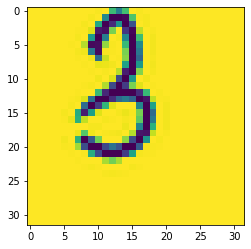

8


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_test[701].reshape(32,32))
plt.show()
print(int(y_test[701]))